In [1]:
import tensorflow as tf
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)
import time

1.4.1


In [2]:
## 3d box iou compute
# Input: points, box:8x3,
# loss function: l_reg_box + l_seg + l_box_corner 

##DONE
# pts_in_box_gpu: in_box_idx=pts_in_box_gpu(pts,box)
# poi_idx = pts_in_box_gpu(pts,box_union)

#Main loop

# delta_x = center_new - center_old
# box_old_shift = box_old + delta_x
# in_box_idx=pts_in_box_gpu(pts,box)
# new_label = label_prop(poi())
# new_box = get_box()
# 

## label propagation
  ## bounded label point localizer

## T-net

## compute dx

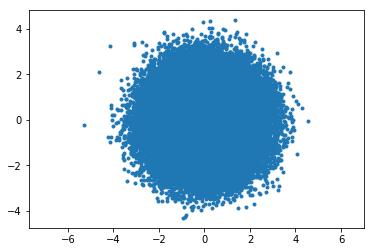

In [66]:
mybox=np.array([[-2,-1],[-2,1],[2,1],[2,-1]],dtype=np.float32)
theta=1.57
rot=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
newbox=np.matmul(mybox,rot)

points=np.random.randn(200000,2)
pts_flat=points


def plotline(pts1,pts2):
    plt.plot([pts1[0],pts2[0]],[pts1[1],pts2[1]],'b-')

plotline(newbox[0,:],newbox[1,:])
plotline(newbox[1,:],newbox[2,:])
plotline(newbox[2,:],newbox[3,:])
plotline(newbox[3,:],newbox[0,:])
plt.axis('equal')
plt.plot(points[:,0],points[:,1],'.')

In [67]:
inBox=tf.load_op_library('./tf_inBoxCheck.so')

In [68]:
def swaprow(A,i,j):
    tmp=list(A[i,:])
    A[i,:]=A[j,:]
    A[j,:]=tmp
    return A
def correctbox(A):
    A=A[A[:,0].argsort(),:]
    A=swaprow(A,2,3)
    if A[1,1]<A[3,1]: A=swaprow(A,1,3)
    return A

newbox=correctbox(newbox).astype(np.float32)
box_flat=newbox
box_flat2=mybox

In [69]:
config= tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
config.log_device_placement = False
sess=tf.InteractiveSession(config=config)
pts_input=tf.placeholder(shape=[None],dtype=tf.float32)
box_input=tf.placeholder(shape=[8],dtype=tf.float32)
from tensorflow.python.framework import ops
#Only the first half of output is what we need due to my program mistake

In [70]:
t3=time.time()
out2=sess.run(inBox.in_box_check(pts_flat,box_flat))
t4=time.time()
print('Time elapsed: ',t4-t3)

('Time elapsed: ', 0.053114891052246094)


In [71]:
ind0=np.where(out2==0)[0]
print(len(ind),len(ind2),len(ind0))

(130637, 69363, 0)


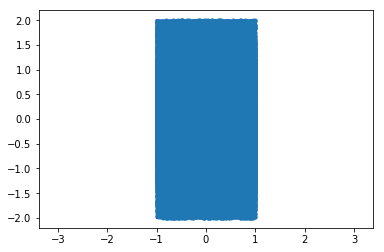

In [72]:
plt.figure(1)
ind3=np.where(out2==1)[0]
plotline(newbox[0,:],newbox[1,:])
plotline(newbox[1,:],newbox[2,:])
plotline(newbox[2,:],newbox[3,:])
plotline(newbox[3,:],newbox[0,:])
plt.axis('equal')
plt.plot(points[ind3,0],points[ind3,1],'.')

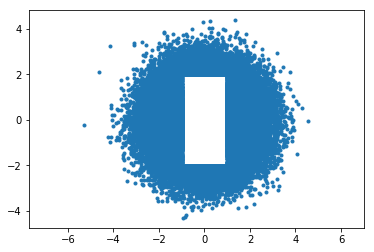

In [73]:
plt.figure(1)
ind4=np.where(out2==-1)[0]
plotline(newbox[0,:],newbox[1,:])
plotline(newbox[1,:],newbox[2,:])
plotline(newbox[2,:],newbox[3,:])
plotline(newbox[3,:],newbox[0,:])
plt.axis('equal')
plt.plot(points[ind4,0],points[ind4,1],'.')

In [74]:
dir(inBox)

['LIB_HANDLE',
 'OP_LIST',
 '_InitOpDefLibrary',
 '__builtins__',
 '__doc__',
 '__name__',
 '__package__',
 '_collections',
 '_common_shapes',
 '_op_def_lib',
 '_op_def_library',
 '_op_def_pb2',
 '_op_def_registry',
 '_ops',
 'in_box_check']